In [2]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d_%H-%M}"
today

'2020-03-12_12-51'

In [4]:
#imports
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Ref_im_Cells

In [ ]:
#feature enrichment and normlization were as discribed in the methods
#refer to (GioeleLa Manno, 2016, doi: 10.1016/j.cell.2016.09.027); (TM Malta,2018, doi: 10.1016/j.cell.2018.03.034); (V Hovestadt, 2019, doi: 10.1038/s41586-019-1434-6); 

In [10]:
mdf_train_set=pd.read_table("normalized_Ref_expression_immune_cells.csv",index_col=0, header=0, sep="\t")

In [11]:
#mprotogruop  is cell-type list
bool1 = mprotogruop != nan
mclasses_names, mclasses_index =unique(mprotogruop[bool1], return_inverse=True, return_counts=False)
mtrain_index = mclasses_index
mdf_train_set = mdf_train_set.ix[:,bool1].copy()
mtrain_index[:5]

,4602STDY6976426_CCACGGATCTGGCGTG-1,CZIKidney7632804_CTCTAATAGCAAATCA-1,CZIKidney7632804_CTGCTGTAGAGATGAG-1,CZIKidney7632804_GGTGAAGAGTGAAGAG-1,CZIKidney7632803_GCTGCTTTCTTCCTTC-1,CZIKidney7632803_CTGCCTACATGACATC-1,CZIKidney7587407_GGCTGGTCAGTACACT-1,4602STDY7090428_GATCGATCAAGCTGAG-1,CZIKidney7632803_GAATAAGTCCACTCCA-1,CZIKidney7587422_GTGCTTCCACACCGAC-1,...,CZIKidney7632804_TTGGAACTCTCTGCTG-1,4602STDY7018630_GTGTGCGTCGGAAACG-1,CZIKidney7632803_ACCAGTAAGGCGTACA-1,4602STDY6949178_TACGGGCAGGCTACGA-1,CZIKidney7587406_GGCTCGAAGGAGTTTA-1,CZIKidney7632803_GCAAACTGTAAGTGGC-1,4602STDY6949179_CTACATTTCAGAGACG-1,CZIKidney7632804_GATCAGTTCTAGCACA-1,4602STDY6949181_GTGCGGTGTAAAGGAG-1,CZIKidney7632803_TTAGGCACAATAAGCA-1
index,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
mtrain_index = mclasses_index.astype(int)
mtrain_index

array([8, 1, 0, ..., 1, 1, 4])

In [102]:
dfex=mdf_train_set.sum(1)
dfex=dfex.loc[dfex!=0]
mdf_train_set=mdf_train_set.loc[dfex.index]
mdf_train_set.shape

(5087, 7803)

In [120]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
normalizer = 0.9*mdf_train_set.values.max(1)[:,newaxis]
LR = LogisticRegressionCV(Cs=logspace(-4,1,20), refit=True, penalty='l2',
                          solver='newton-cg', fit_intercept=False, multi_class='multinomial',class_weight='balanced',
                          cv=StratifiedShuffleSplit(n_splits=35, test_size=0.25, random_state=12350).split((mdf_train_set.values/normalizer).T,mtrain_index)
                         )

LR.fit((mdf_train_set.values/normalizer).T, 
    mtrain_index.astype(int))

LogisticRegressionCV(Cs=array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
                     class_weight='balanced',
                     cv=<generator object BaseShuffleSplit.split at 0x000001B36CD13360>,
                     dual=False, fit_intercept=False, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='multinomial',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='newton-cg', tol=0.0001, verbose=0)

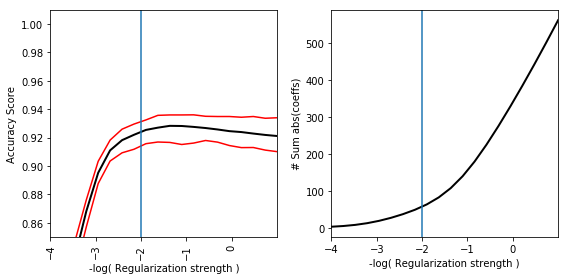

In [125]:
PlotRegularization strength(CMA=LR.coefs_paths_[1], CSvalues=LR.Cs_,chos=0.01,LRScor=LR.scores_)

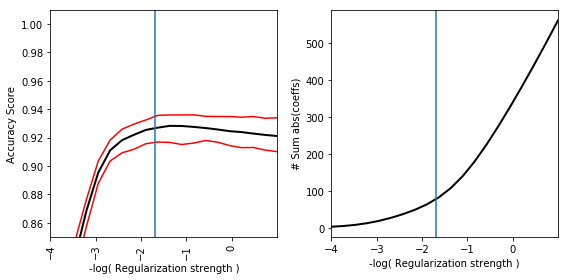

In [126]:
PlotRegularization strength(CMA=LR.coefs_paths_[1], CSvalues=LR.Cs_,chos=0.02,LRScor=LR.scores_)

## reset the score as 0.015

In [163]:
cvalue=0.015
LR = LogisticRegression(C=cvalue, penalty='l2', solver='newton-cg', fit_intercept=False,
                        multi_class='multinomial',class_weight='balanced',random_state=150790)
normalizer = 0.9*mdf_train_set.values.max(1)[:,newaxis]
LR.fit((mdf_train_set.values / normalizer).T, mtrain_index)

LogisticRegression(C=0.025, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=150790, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [167]:
enrichment_order =[
'B cell',
 'CD4 T cell',
 'CD8 T cell',
 'MNP-a/classical monocyte derived',
 'MNP-b/non-classical monocyte derived',
 'MNP-c/dendritic cell',
 'MNP-d/Tissue macrophage',
 'Mast cell',
 'NK cell',
 'NKT cell',
 'Neutrophil',
 'Plasmacytoid dendritic cell'
 ]
sel_class ='B cell'
mwanted_order =[
'B cell',
 'CD4 T cell',
 'CD8 T cell',
 'MNP-a/classical monocyte derived',
 'MNP-b/non-classical monocyte derived',
 'MNP-c/dendritic cell',
 'MNP-d/Tissue macrophage',
 'Mast cell',
 'NK cell',
 'NKT cell',
 'Neutrophil',
 'Plasmacytoid dendritic cell'

 ]
mreorder_ix = [list(mclasses_names).index(i) for i in mwanted_order]
mbool00 = in1d( mclasses_names[mclasses_index],  mwanted_order )
mcolor_dict = pd.read_table("im_Cell-type_Color_Annotation.txt",index_col=0,header=0,sep="\t")
mcolor_dict = mcolor_dict.map(lambda x: list(map(lambda y: y/255., x)))

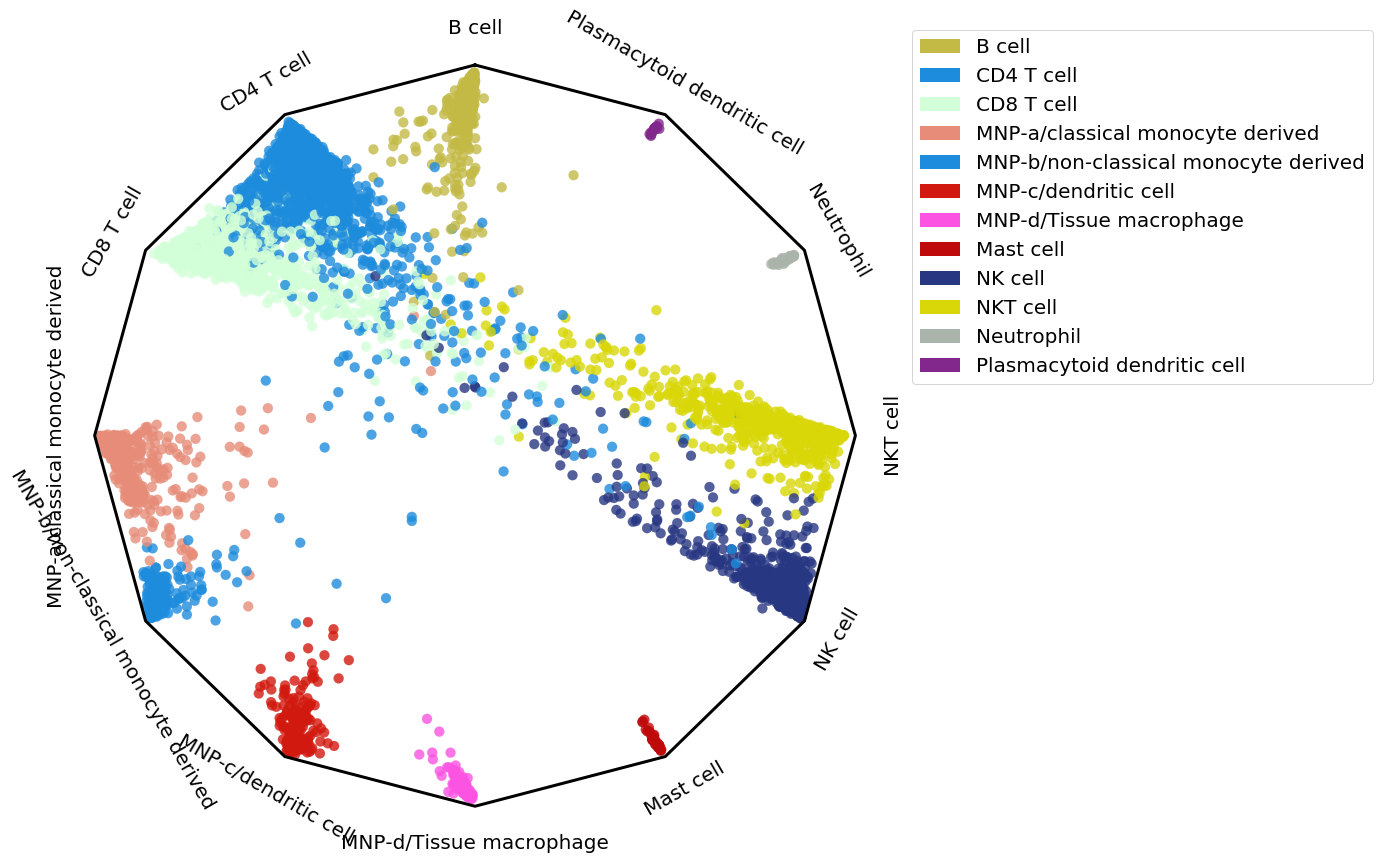

In [168]:
refdataLR=LR.predict_proba((mdf_train_set.values/ normalizer).T)
dataRef=refdataLR[:,mreorder_ix]

cParams['savefig.dpi'] = 500

mnewdata,axm = 2020polygonalPlot(refdataLR[:,mreorder_ix], sides=len(mreorder_ix), labels=mclasses_names[mreorder_ix])
2020polygonalPlotprediction (xValue=mnewdata[mbool00,0],yValue=mnewdata[mbool00,1], mnewcolors= array(list(mcolor_dict[mprotogruop].values)), size=100, lw=0.2)


mkdir "D:/Dropbox/data/proj/PE_HYZ/IpythonRecord/2017_GBM_Final_Ready/StableModule_Skorch__NN-Merge_PE_GBM_AllotherGBM_Vs_mBloodVesslecells"

In [169]:
mreordername=[]
for i in mreorder_ix:
    mreordername.append(list(mclasses_names)[i]) 
dfprobRef=pd.DataFrame(dataRef*100, index=mdf_train_set.columns,columns=mreordername)
dfprobRef.head()

,B cell,CD4 T cell,CD8 T cell,MNP-a/classical monocyte derived,MNP-b/non-classical monocyte derived,MNP-c/dendritic cell,MNP-d/Tissue macrophage,Mast cell,NK cell,NKT cell,Neutrophil,Plasmacytoid dendritic cell
4602STDY6976426_CCACGGATCTGGCGTG-1,0.187484,0.518269,0.597561,0.190645,0.119641,0.377951,0.069707,0.295849,94.128076,3.156264,0.096908,0.261645
CZIKidney7632804_CTCTAATAGCAAATCA-1,2.921161,80.920475,10.108889,0.323589,0.413181,0.382445,0.161237,0.629680,0.543707,2.968346,0.267388,0.359902
CZIKidney7632804_CTGCTGTAGAGATGAG-1,94.480249,0.985668,0.491029,0.316822,0.960521,1.166467,0.396518,0.232840,0.182188,0.366588,0.085846,0.335265
CZIKidney7632804_GGTGAAGAGTGAAGAG-1,0.321858,1.624761,0.782034,0.113571,0.538594,0.066627,0.133748,0.193182,86.993647,8.860081,0.120855,0.251043
CZIKidney7632803_GCTGCTTTCTTCCTTC-1,98.016870,0.628016,0.396752,0.071355,0.164834,0.161159,0.079797,0.083902,0.068905,0.134682,0.045355,0.148372


In [175]:
test0=PermutationTest(data=mdf_train_set, LR=LR)

In [176]:
test0.shape

(234090, 12)

In [178]:
thresholdlist=[]
temp=[]
for threshold in np.arange(0.0, 1.0, 0.01):
    thresholdlist.append("Prob_%s%%"%int(threshold*100))
    temp.append((sum(test0>threshold,axis=0)/test0.shape[0]))
ratiodf=pd.DataFrame(temp)
ratiodf.index=thresholdlist
ratiodf.columns=mclasses_names
ratiodf

,B cell,CD4 T cell,CD8 T cell,MNP-a/classical monocyte derived,MNP-b/non-classical monocyte derived,MNP-c/dendritic cell,MNP-d/Tissue macrophage,Mast cell,NK cell,NKT cell,Neutrophil,Plasmacytoid dendritic cell
Prob_0%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Prob_1%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Prob_2%,0.999953,0.999944,0.999803,0.999910,0.999953,1.000000,0.999522,0.999996,0.999876,0.999970,0.999987,0.999991
Prob_3%,0.998800,0.999663,0.997591,0.996040,0.996617,0.999838,0.977030,0.999218,0.998872,0.999013,0.996958,0.999808
Prob_4%,0.988475,0.998197,0.984685,0.960443,0.964321,0.997433,0.827507,0.981691,0.992593,0.988799,0.944090,0.996083
Prob_5%,0.945051,0.993656,0.937127,0.842736,0.856816,0.980478,0.552984,0.863493,0.971438,0.944376,0.721505,0.964757
Prob_6%,0.845068,0.982887,0.832680,0.648635,0.669580,0.923756,0.307642,0.591572,0.916306,0.839126,0.408621,0.848302
Prob_7%,0.689188,0.961968,0.681456,0.443816,0.464279,0.810906,0.157598,0.312512,0.816284,0.684929,0.187945,0.632573
Prob_8%,0.516062,0.926802,0.520992,0.279786,0.293614,0.657854,0.078179,0.142616,0.682789,0.522709,0.078867,0.391807
Prob_9%,0.362954,0.874839,0.382447,0.169401,0.175830,0.496006,0.038976,0.060447,0.542535,0.383664,0.032265,0.209172


In [191]:
ratiodf.shape

(100, 12)

In [ ]:
refdataLR=LR.predict_proba((mdf_train_set.values/ normalizer).T)
dataRef=refdataLR[:,mreorder_ix]
rcParams['savefig.dpi'] = 500

mnewdata,axm = 2020polygonalPlot(refdataLR[:,mreorder_ix], sides=len(mreorder_ix), labels=mclasses_names[mreorder_ix])
2020polygonalPlotprediction (xValue=mnewdata[mbool00,0],yValue=mnewdata[mbool00,1], mnewcolors= array(list(mcolor_dict[mprotogruop].values)), size=100, lw=0.2)


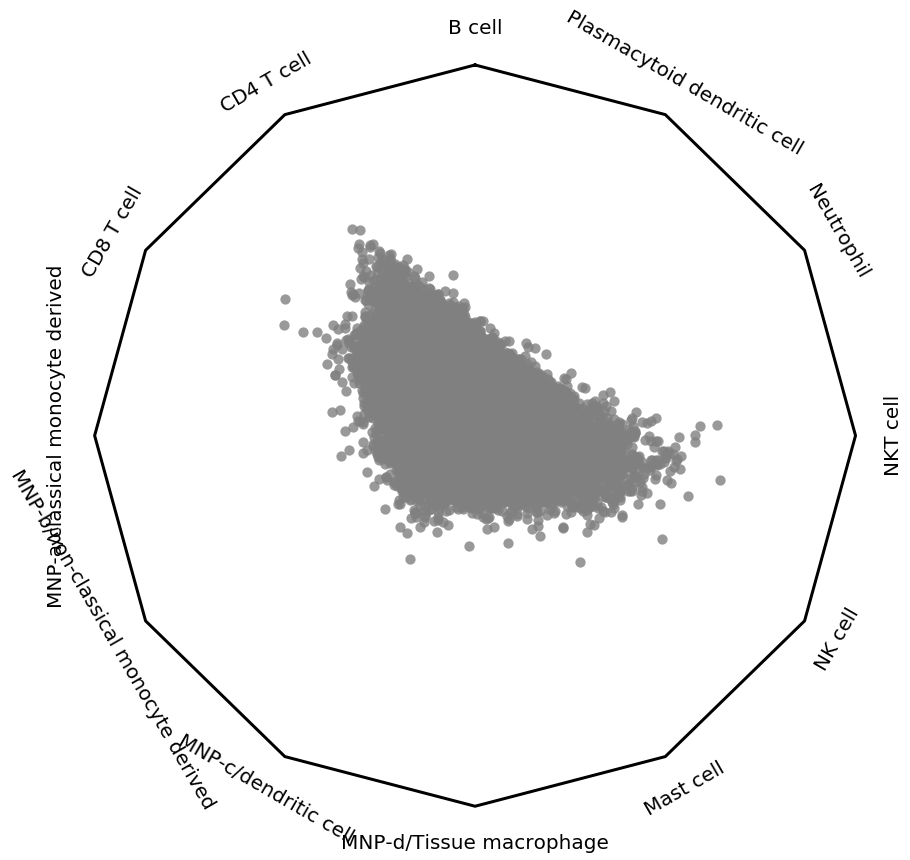

In [185]:
rcParams['savefig.dpi'] = 500
mnewcolors = array(list(mcolor_dict[mprotogruop].values))
refdataLR=test0
mnewdata,axm = polygonalPlot(refdataLR[:,mreorder_ix], sides=len(mreorder_ix), labels=mclasses_names[mreorder_ix])
2020polygonalPlotprediction (xValue=mnewdata[mbool00,0],yValue=mnewdata[mbool00,1], mnewcolors= array(list(mcolor_dict[mprotogruop].values)), size=100, lw=0.2)

plt.savefig("Reference_Negtive_Ctrl.pdf",bbox_inches='tight')

#plt.savefig("WithGBMDGmvGeneTF_DG10x_vs_PEgbm_wheelPlot%sNoNeuron.png"%cvalue,bbox_inches='tight')

In [189]:
dfprobRefperm=pd.DataFrame(test*100, index=mdf_train_set.columns,columns=mreordername)
dfprobRefperm.head()

(5087, 7803)

In [871]:
#dfprobRefperm.to_csv("Refpermutatoin.txt",sep="\t")

# Prediction

Input prediction data, and repeat LR